# External Dependencies of Java Artifacts with Neo4j
<br>  

### References
- [jqassistant](https://jqassistant.org)
- [py2neo](https://py2neo.org/2021.1/)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
from py2neo import Graph

In [2]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.
graph = Graph("bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))

In [3]:
def get_cypher_query_from_file(filename):
    with open(filename) as file:
        return ' '.join(file.readlines())

In [4]:
def query_cypher_to_data_frame(filename):
    return graph.run(get_cypher_query_from_file(filename)).to_data_frame()

In [5]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [6]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [7]:
# Main Colormap
main_color_map = 'nipy_spectral'

## External Package Usage

### Table 1 - Top 20 most used external packages overall

In [8]:
external_package_useage=query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_overall.cypher")

# Select columns and only show the first 20 entries (head)
external_package_useage.head(20)

,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,allTypes,externalTypeNames
0,javax.annotation,324,1406,2503,"[Nonnull, Nullable, PreDestroy]"
1,org.slf4j,190,534,2503,"[Logger, LoggerFactory]"
2,javax.persistence,75,334,2503,"[Index, Table, Entity, EntityExistsException, ..."
3,jakarta.persistence,66,322,2503,"[Index, Table, Entity, EntityExistsException, ..."
4,org.hamcrest,61,498,2503,"[CoreMatchers, Matcher, Description, StringDes..."
5,com.fasterxml.jackson.annotation,54,84,2503,"[JsonProperty, JsonGetter, JsonTypeInfo, JsonT..."
6,org.quartz,37,226,2503,"[JobDataMap, Job, SchedulerContext, JobExecuti..."
7,reactor.core.publisher,31,124,2503,"[Mono, Flux, FluxSink$OverflowStrategy, FluxSi..."
8,com.fasterxml.jackson.databind,15,73,2503,"[DeserializationContext, JsonDeserializer, Jso..."
9,org.reactivestreams,12,29,2503,[Publisher]


<Figure size 640x480 with 0 Axes>

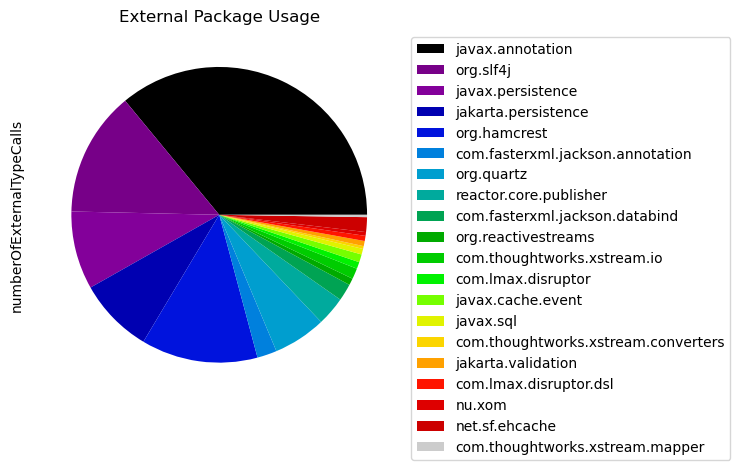

In [9]:
plot.figure();

# Set the name of the index to artifactName
external_package_useage_by_name=external_package_useage.set_index('externalPackageName')

axis = external_package_useage_by_name.head(20).plot(
    y='numberOfExternalTypeCalls', 
    kind='pie',
    title='External Package Usage',
    legend=True,
    labeldistance=None,
    cmap=main_color_map
)
axis.legend(bbox_to_anchor=(1, 1), loc='upper left')
plot.show()

### Table 2 - Top 20 least used external packages overall

In [10]:
# Sort by number of external type calls
external_package_least_used=external_package_useage.sort_values(by='numberOfExternalTypeCalls', ascending=True)

# Reset index
external_package_least_used = external_package_least_used.reset_index(drop=True)

# Select columns and only show the first 10 entries (head)
external_package_least_used[['externalPackageName','numberOfExternalTypeCalls']].head(20)


,externalPackageName,numberOfExternalTypeCalls
0,org.junit.rules,1
1,org.junit.jupiter.api,1
2,javax.xml.stream,2
3,org.testcontainers.containers.wait.strategy,2
4,com.fasterxml.jackson.datatype.jsr310,2
5,org.quartz.impl.matchers,2
6,reactor.core,2
7,org.junit.runner,2
8,com.fasterxml.jackson.databind.type,3
9,reactor.util.concurrent,3


### Table 3 - External usage per artifact

In [11]:
query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_artifact.cypher")

,artifactName,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfTypesInArtifact,externalTypeNames
0,axon-configuration-4.7.5,javax.annotation,12,104,39,[Nonnull]
1,axon-configuration-4.7.5,org.slf4j,9,28,39,"[Logger, LoggerFactory]"
2,axon-disruptor-4.7.5,org.slf4j,12,22,22,"[Logger, LoggerFactory]"
3,axon-disruptor-4.7.5,com.lmax.disruptor,9,29,22,"[LifecycleAware, EventHandler, BlockingWaitStr..."
4,axon-disruptor-4.7.5,javax.annotation,6,23,22,[Nonnull]
...,...,...,...,...,...,...
61,axon-test-4.7.5,org.testcontainers.containers.wait.strategy,2,2,85,[Wait]
62,axon-test-4.7.5,org.testcontainers.containers,2,8,85,[GenericContainer]
63,axon-test-4.7.5,org.junit.rules,1,1,85,[TestRule]
64,axon-test-4.7.5,org.junit.runner,1,2,85,[Description]


### Table 4 - External usage per artifact and package

In [12]:
external_package_usage_per_package = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_artifact_and_package.cypher")
external_package_usage_per_package

,artifactName,fullPackageName,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfTypesInPackage,externalTypeNames,packageName
0,axon-test-4.7.5,org.axonframework.test.matchers,org.hamcrest,38,188,24,"[Matcher, BaseMatcher, Description, TypeSafeMa...",matchers
1,axon-messaging-4.7.5,org.axonframework.queryhandling,reactor.core.publisher,24,90,40,"[Mono, Flux, FluxSink, FluxSink$OverflowStrate...",queryhandling
2,axon-messaging-4.7.5,org.axonframework.eventhandling.scheduling.quartz,org.quartz,19,95,6,"[JobExecutionContext, SchedulerContext, JobDet...",quartz
3,axon-messaging-4.7.5,org.axonframework.deadline.quartz,org.quartz,18,131,4,"[JobDataMap, Job, SchedulerContext, JobExecuti...",quartz
4,axon-messaging-4.7.5,org.axonframework.eventhandling,org.slf4j,15,55,93,"[Logger, LoggerFactory]",eventhandling
...,...,...,...,...,...,...,...,...
119,axon-modelling-4.7.5,org.axonframework.modelling.saga.repository.jdbc,javax.sql,1,2,9,[DataSource],jdbc
120,axon-modelling-4.7.5,org.axonframework.modelling.saga.repository.jpa,javax.persistence,1,2,7,[Index],jpa
121,axon-test-4.7.5,org.axonframework.test.aggregate,org.junit.rules,1,1,19,[TestRule],aggregate
122,axon-test-4.7.5,org.axonframework.test.aggregate,org.junit.runner,1,2,19,[Description],aggregate


### Table 5 - Top 20 external package usage per type

In [13]:
external_package_usage_per_type = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_type.cypher")

external_package_usage_per_type.head(20)

,artifactName,fullPackageName,typeName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfExternalPackages,numberOfExternalTypes,externalPackageNames,externalTypeNames,packageName,fullTypeName
0,axon-messaging-4.7.5,org.axonframework.serialization.json,JacksonSerializer,9,29,6,9,"[com.fasterxml.jackson.databind, com.fasterxml...","[com.fasterxml.jackson.databind.ObjectWriter, ...",json,org.axonframework.serialization.json.JacksonSe...
1,axon-messaging-4.7.5,org.axonframework.serialization.xml,XStreamSerializer,7,22,5,7,"[org.dom4j, com.thoughtworks.xstream, com.thou...","[org.dom4j.Document, com.thoughtworks.xstream....",xml,org.axonframework.serialization.xml.XStreamSer...
2,axon-disruptor-4.7.5,org.axonframework.disruptor.commandhandling,DisruptorCommandBus$DisruptorRepository,4,14,4,4,"[javax.annotation, com.lmax.disruptor.dsl, com...","[javax.annotation.Nonnull, com.lmax.disruptor....",commandhandling,org.axonframework.disruptor.commandhandling.Di...
3,axon-disruptor-4.7.5,org.axonframework.disruptor.commandhandling,DisruptorCommandBus,6,34,4,6,"[com.lmax.disruptor.dsl, org.slf4j, javax.anno...","[com.lmax.disruptor.dsl.Disruptor, org.slf4j.L...",commandhandling,org.axonframework.disruptor.commandhandling.Di...
4,axon-messaging-4.7.5,org.axonframework.deadline.quartz,QuartzDeadlineManager,13,78,4,13,"[org.quartz, org.quartz.impl.matchers, org.slf...","[org.quartz.SchedulerException, org.quartz.Sch...",quartz,org.axonframework.deadline.quartz.QuartzDeadli...
5,axon-messaging-4.7.5,org.axonframework.messaging.responsetypes,MultipleInstancesResponseType,7,17,4,7,"[org.slf4j, com.fasterxml.jackson.annotation, ...","[org.slf4j.LoggerFactory, org.slf4j.Logger, co...",responsetypes,org.axonframework.messaging.responsetypes.Mult...
6,axon-messaging-4.7.5,org.axonframework.queryhandling,SimpleQueryUpdateEmitter,13,33,4,13,"[org.reactivestreams, reactor.core.publisher, ...","[org.reactivestreams.Publisher, reactor.core.p...",queryhandling,org.axonframework.queryhandling.SimpleQueryUpd...
7,axon-messaging-4.7.5,org.axonframework.serialization,AbstractXStreamSerializer$MetaDataConverter,6,14,4,6,"[com.thoughtworks.xstream.converters, com.thou...",[com.thoughtworks.xstream.converters.Marshalli...,serialization,org.axonframework.serialization.AbstractXStrea...
8,axon-messaging-4.7.5,org.axonframework.serialization,GapAwareTrackingTokenConverter$ReflectivelyCon...,6,25,4,6,"[com.thoughtworks.xstream.converters, com.thou...",[com.thoughtworks.xstream.converters.Marshalli...,serialization,org.axonframework.serialization.GapAwareTracki...
9,axon-messaging-4.7.5,org.axonframework.serialization,GapAwareTrackingTokenConverter,6,25,4,6,"[com.thoughtworks.xstream.mapper, com.thoughtw...","[com.thoughtworks.xstream.mapper.Mapper, com.t...",serialization,org.axonframework.serialization.GapAwareTracki...


### Table 6 - External package usage distribution per type

The table shown here only includes the first 20 rows at most which typically represents the most significant entries.
Have a look above to find out which types have the highest external package dependency usage.

In [14]:
external_package_usage_per_type_distribution = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_type_distribution.cypher")
external_package_usage_per_type_distribution[['artifactName', 'artifactTypes', 'numberOfExternalPackages', 'numberOfTypes', 'numberOfTypesPercentage']].head(20)

,artifactName,artifactTypes,numberOfExternalPackages,numberOfTypes,numberOfTypesPercentage
0,axon-configuration-4.7.5,39,1,5,12.820513
1,axon-disruptor-4.7.5,22,1,2,9.090909
2,axon-disruptor-4.7.5,22,2,4,18.181818
3,axon-disruptor-4.7.5,22,3,3,13.636364
4,axon-eventsourcing-4.7.5,130,1,12,9.230769
5,axon-eventsourcing-4.7.5,130,2,3,2.307692
6,axon-eventsourcing-4.7.5,130,3,2,1.538462
7,axon-messaging-4.7.5,729,1,100,13.717421
8,axon-messaging-4.7.5,729,2,29,3.978052
9,axon-messaging-4.7.5,729,3,4,0.548697


In [15]:

# Organize artifacts in columns with the number of types as values using pivot
# Every row represents the number of external packages
external_package_usage_per_type_distribution=external_package_usage_per_type_distribution.pivot(index='numberOfExternalPackages', columns='artifactName', values='numberOfTypesPercentage')

# Fill missing values with zero
external_package_usage_per_type_distribution.fillna(0, inplace=True)

# Convert to integer
# external_package_usage_per_type_distribution=external_package_usage_per_type_distribution.astype(int)

external_package_usage_per_type_distribution.head(10)

artifactName,axon-configuration-4.7.5,axon-disruptor-4.7.5,axon-eventsourcing-4.7.5,axon-messaging-4.7.5,axon-modelling-4.7.5,axon-test-4.7.5
numberOfExternalPackages,,,,,,
1,12.820513,9.090909,9.230769,13.717421,6.040268,32.941176
2,0.000000,18.181818,2.307692,3.978052,2.013423,2.352941
3,0.000000,13.636364,1.538462,0.548697,0.000000,3.529412
4,0.000000,0.000000,0.000000,0.548697,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.274348,0.000000,0.000000


<Figure size 640x480 with 0 Axes>

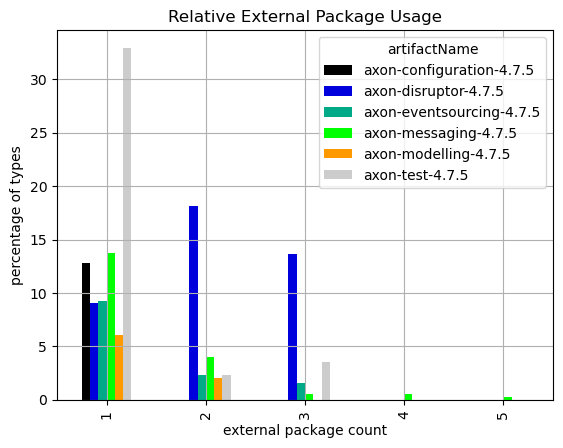

In [16]:
plot.figure();
axes = external_package_usage_per_type_distribution.plot(
    kind='bar', 
    grid=True,
    title='Relative External Package Usage', 
    xlabel='external package count',
    ylabel='percentage of types',
    cmap=main_color_map,
)
plot.show()

## Maven POMs

### Table 7 - Maven POMs and their declared dependencies

In [17]:
query_cypher_to_data_frame("../cypher/External_Dependencies/Maven_POMs_and_their_declared_dependencies.cypher")

,pom.artifactId,pom.name,scope,dependency.optional,dependentArtifact.group,dependentArtifact.name
0,axon-configuration,Axon Framework - Configuration,test,False,javax.inject,javax.inject
1,axon-configuration,Axon Framework - Configuration,provided,False,com.google.code.findbugs,jsr305
2,axon-configuration,Axon Framework - Configuration,test,False,org.quartz-scheduler,quartz
3,axon-configuration,Axon Framework - Configuration,default,True,jakarta.annotation,jakarta.annotation-api
4,axon-configuration,Axon Framework - Configuration,default,False,${project.groupId},axon-eventsourcing
...,...,...,...,...,...,...
104,axon-test,Axon Framework - Test Fixtures,default,True,org.testcontainers,testcontainers
105,axon-test,Axon Framework - Test Fixtures,default,True,org.hamcrest,hamcrest-library
106,axon-test,Axon Framework - Test Fixtures,test,False,jakarta.persistence,jakarta.persistence-api
107,axon-test,Axon Framework - Test Fixtures,default,True,org.hamcrest,hamcrest
